<a href="https://colab.research.google.com/github/Luiz-Souza1993/Data_Science_Python/blob/main/Arvore_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('risco_credito.pickle', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

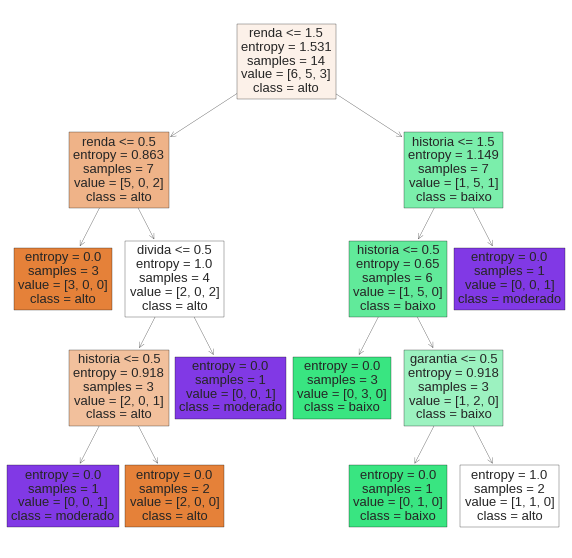

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt 
previsores = ['historia','divida','garantia','renda']
figura, eixos = plt.subplots(ncols = 1, nrows = 1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names = previsores, class_names= arvore_risco_credito.classes_,filled = True)
plt.show()

In [ ]:
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

In [ ]:
with open('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion = 'entropy')
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_credit_teste,previsoes)
accuracy

0.982

0.982

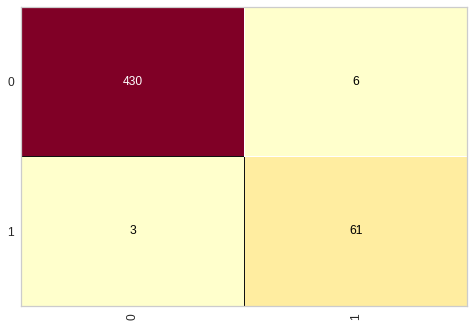

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento,y_credit_treinamento)
cm.score(x_credit_teste,y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



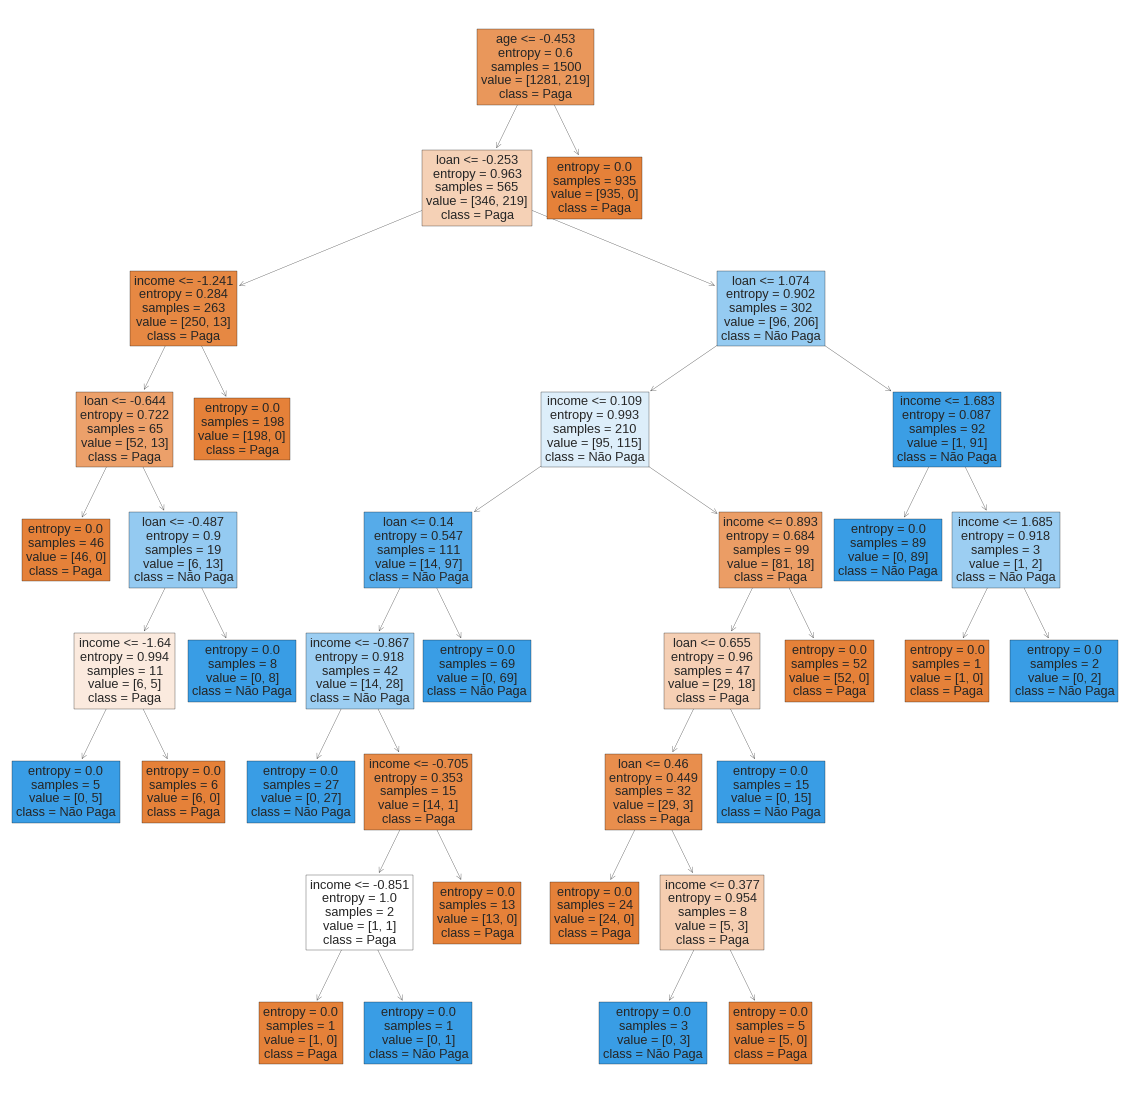

In [ ]:
previsores = ['income','age','loan']
figura,eixos = plt.subplots(nrows = 1, ncols =1, figsize = (20,20))
tree.plot_tree(arvore_credit, feature_names= previsores, class_names = ['Paga','Não Paga'], filled = True)
figura.savefig('arvore_credit_predict.png')
plt.show()

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, x_census_teste.shape

((27676, 108), (4885, 108))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
previsoes = arvore_census.predict(x_census_teste)

In [ ]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.809007164790174

0.809007164790174

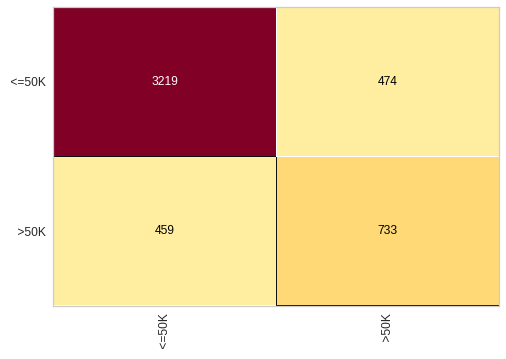

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
with open('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=1000, criterion = 'entropy')

In [ ]:
random_forest_credit.fit(x_credit_treinamento,y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

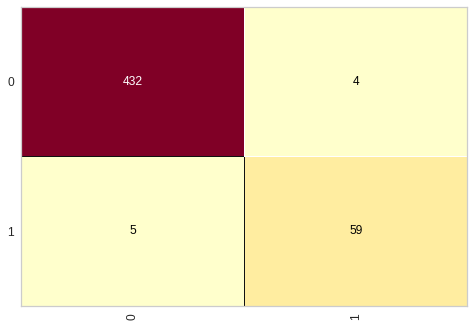

In [ ]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste,y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, x_census_teste.shape

((27676, 108), (4885, 108))

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators = 400, criterion = 'entropy')

In [ ]:
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [ ]:
previsoes = random_forest_census.predict(x_census_teste)

In [ ]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8511770726714432

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.8511770726714432

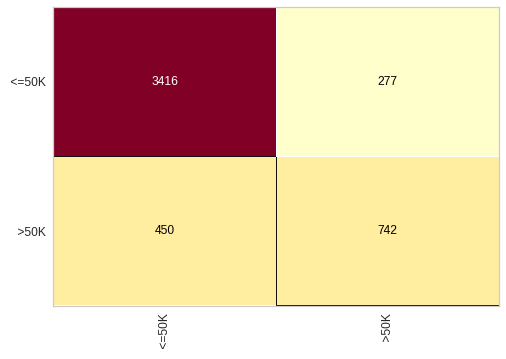

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

